<a href="https://colab.research.google.com/github/rohanrohan2012/AgeDetection/blob/master/v3_Age_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import zipfile
import cv2
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D ,AveragePooling2D, Flatten, Dropout
from keras.layers.core import Dense
from keras.optimizers import RMSprop,Adam,SGD
from keras.layers.normalization import BatchNormalization
from keras.layers.core import Activation
from keras.preprocessing.image import ImageDataGenerator

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [2]:
os.getcwd()

'/content'

In [0]:
handle_train=zipfile.ZipFile(r'/content/Train.zip')
handle_train.extractall('/content/train')
handle_train.close()
handle_test=zipfile.ZipFile(r'/content/Test.zip')
handle_test.extractall('/content/test')
handle_test.close()

In [0]:
train_images=os.listdir('/content/train/Train/')
test_images = os.listdir('/content/test/Test')

filepath_train = '/content/train/Train/'
filepath_test = '/content/test/Test/' 

In [6]:
train_labels = pd.read_csv('/content/train.csv')
train_labels.head(10)

,ID,Class
0,377.jpg,MIDDLE
1,17814.jpg,YOUNG
2,21283.jpg,MIDDLE
3,16496.jpg,YOUNG
4,4487.jpg,MIDDLE
5,6283.jpg,MIDDLE
6,23495.jpg,YOUNG
7,7100.jpg,YOUNG
8,6028.jpg,YOUNG
9,22617.jpg,OLD


In [7]:
df_train = pd.read_csv('/content/train.csv')
df_train.head(10)

,ID,Class
0,377.jpg,MIDDLE
1,17814.jpg,YOUNG
2,21283.jpg,MIDDLE
3,16496.jpg,YOUNG
4,4487.jpg,MIDDLE
5,6283.jpg,MIDDLE
6,23495.jpg,YOUNG
7,7100.jpg,YOUNG
8,6028.jpg,YOUNG
9,22617.jpg,OLD


In [0]:

images=[]
labels=[]

for index, row in df_train.iterrows():
  image=cv2.imread(filepath_train+row['ID'])
  image=cv2.resize(image , (40,96))
  images.append(image)
  labels.append(row['Class'])
  #print(row['ID'])


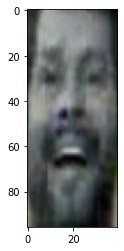

In [13]:
plt.imshow(images[0])

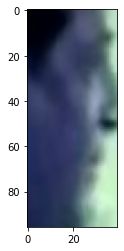

In [14]:
plt.imshow(images[50])

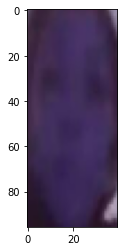

In [15]:
plt.imshow(images[500])

In [0]:
images_test=[]

for i in test_images:
  image=cv2.imread(filepath_test+i)
  image=cv2.resize(image , (40,96))
  images_test.append(image) 

In [0]:
images = np.array(images, dtype="float") / 255.0
images_test = np.array(images_test, dtype="float") / 255.0
labels = np.array(labels)

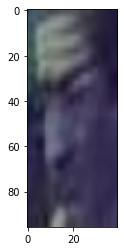

In [18]:
plt.imshow(images_test[0])

In [0]:
(trainX, testX, trainY, testY) = train_test_split(images,labels, test_size=0.30, random_state=6)

In [0]:
trainX=trainX.reshape((-1,40,96,3))
testX=testX.reshape((-1,40,96,3))

In [0]:
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

In [0]:
lb.classes_

array(['MIDDLE', 'OLD', 'YOUNG'], dtype='<U6')

In [22]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = "same", activation ='relu', input_shape = (40,96,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization(axis=-1))
#model.add(Dropout(0.25))

model.add(Conv2D(filters=32,kernel_size=(3,3), padding="same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization(axis=-1))

model.add(Conv2D(filters=32,kernel_size=(3,3), padding="same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dense(32,activation='relu'))

# softmax classifier
model.add(Dense(3,activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 40, 96, 32)        2432      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 20, 48, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 20, 48, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 48, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 24, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 10, 24, 32)        128       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 24, 32)       

In [0]:
INIT_LR = 0.001 
EPOCHS = 30 #30
BS = 64

opt=Adam(lr=INIT_LR)

model.compile(loss="categorical_crossentropy", optimizer=opt,	metrics=["accuracy"])

In [0]:
aug = ImageDataGenerator(rotation_range=30, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,horizontal_flip=True, fill_mode="nearest")

In [33]:
H = model.fit_generator(aug.flow(trainX, trainY, batch_size=BS),validation_data=(testX, testY), steps_per_epoch=len(trainX) // BS,epochs=EPOCHS)

Epoch 1/30
217/217 [==============================] - 22s 101ms/step - loss: 0.6697 - accuracy: 0.7059 - val_loss: 0.8424 - val_accuracy: 0.6038
Epoch 2/30
217/217 [==============================] - 21s 98ms/step - loss: 0.6666 - accuracy: 0.7071 - val_loss: 0.7145 - val_accuracy: 0.6932
Epoch 3/30
217/217 [==============================] - 21s 98ms/step - loss: 0.6609 - accuracy: 0.7103 - val_loss: 0.8966 - val_accuracy: 0.6083
Epoch 4/30
217/217 [==============================] - 21s 97ms/step - loss: 0.6551 - accuracy: 0.7121 - val_loss: 0.7609 - val_accuracy: 0.6830
Epoch 5/30
217/217 [==============================] - 21s 98ms/step - loss: 0.6463 - accuracy: 0.7207 - val_loss: 0.7745 - val_accuracy: 0.6629
Epoch 6/30
217/217 [==============================] - 21s 96ms/step - loss: 0.6474 - accuracy: 0.7174 - val_loss: 0.9002 - val_accuracy: 0.6425
Epoch 7/30
217/217 [==============================] - 21s 96ms/step - loss: 0.6489 - accuracy: 0.7174 - val_loss: 0.7062 - val_accuracy

In [34]:
predictions = model.predict(testX, batch_size=BS)
print(classification_report(testY.argmax(axis=1),predictions.argmax(axis=1), target_names=lb.classes_))

              precision    recall  f1-score   support

      MIDDLE       0.77      0.71      0.74      3183
         OLD       0.58      0.26      0.36       692
       YOUNG       0.63      0.82      0.72      2097

    accuracy                           0.70      5972
   macro avg       0.66      0.60      0.60      5972
weighted avg       0.70      0.70      0.69      5972



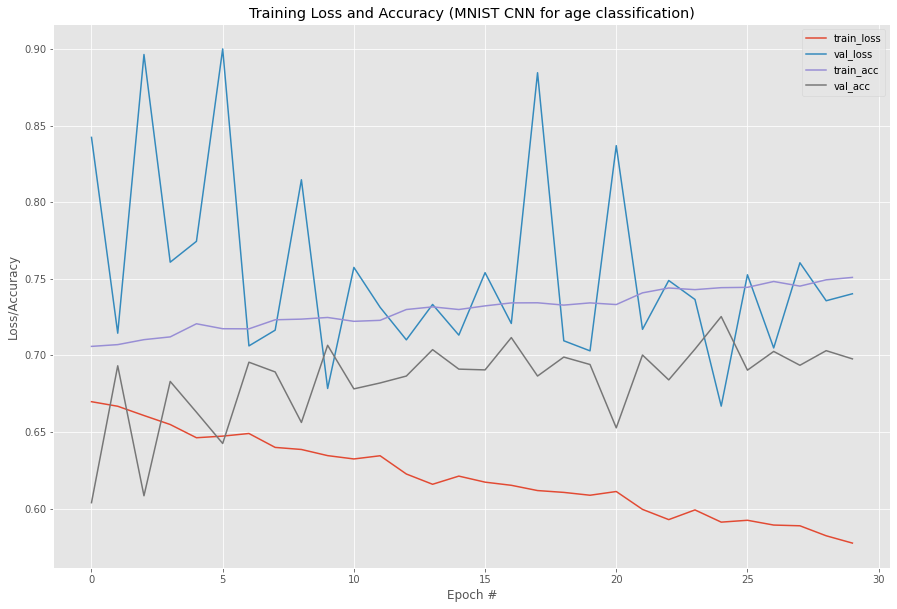

In [35]:
# plot the training loss and accuracy
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure(figsize=(15,10))
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, H.history["accuracy"], label="train_acc")
plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy (MNIST CNN for age classification)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()